https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

1. **Normality Tests**
   1. Shapiro-Wilk Test
   2. D’Agostino’s K^2 Test
   3. Anderson-Darling Test

2. **Correlation Tests**
   1. Pearson’s Correlation Coefficient
   2. Spearman’s Rank Correlation
   3. Kendall’s Rank Correlation
   4. Chi-Squared Test

3. **Stationary Tests**
   1. Augmented Dickey-Fuller
   2. Kwiatkowski-Phillips-Schmidt-Shin

4. **Parametric Statistical Hypothesis Tests**
   1. Student’s t-test
   2. Paired Student’s t-test
   3. Analysis of Variance Test (ANOVA)
   4. Repeated Measures ANOVA Test

5. **Nonparametric Statistical Hypothesis Tests**
   1. Mann-Whitney U Test
   2. Wilcoxon Signed-Rank Test
   3. Kruskal-Wallis H Test
   4. Friedman Test

# 1. Normality Tests

This section lists statistical tests that you can use to check if your data has a Gaussian distribution.

## Shapiro-Wilk Test

Imagine that you have a data sample ordered as [1, 2, 3, 4, 5] and the theoretical expected values in a normal distribution for these points are [1.1, 2.1, 3.0, 4.0, 5.1]. The difference between each observed and expected value would be small, which would generate a high W value and a conclusion of normality. However, if the observed values were [1, 1, 1, 3, 5, 8], the deviations would be larger, resulting in a low W and indicating that the sample probably does not follow a normal distribution.

**Assumptions**

Observations in each sample are independent and identically distributed (iid).

**Interpretation**

- **H0**: the sample has a Gaussian distribution.
- **H1**: the sample does not have a Gaussian distribution.

In [9]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


## D’Agostino’s $K^2$ Test

Este test se enfoca en dos características de la distribución: la **asimetría (skewness)** y la **curtosis (kurtosis)**

**Assumptions**

Observations in each sample are independent and identically distributed (iid).

**Interpretation**

- **H0**: the sample has a Gaussian distribution.
- **H1**: the sample does not have a Gaussian distribution.

In [10]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/opt/miniconda3/envs/DataMining/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


## Anderson-Darling Test

Is an improved version of the **Kolmogorov-Smirnov** test, as it gives more weight to the extremes of the distribution, making it particularly useful for detecting deviations in the tails of the distribution **(extreme values)**.

**Assumptions**

Observations in each sample are independent and identically distributed (iid).

**Interpretation**

- **H0**: the sample has a Gaussian distribution.
- **H1**: the sample does not have a Gaussian distribution.

In [16]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print(f"stat={result.statistic}")
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.4239737141854807
Probably Gaussian


# 2. Correlation Tests

## Pearson's correlation Coefficient

This section lists statistical tests that you can use to check if two samples are related.

**Assumptions**

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed
- Observations in each sample have the same variance

**Interpretation**

- **H0**: the two samples are independent.
- **H1**: there is a dependency between the samples.

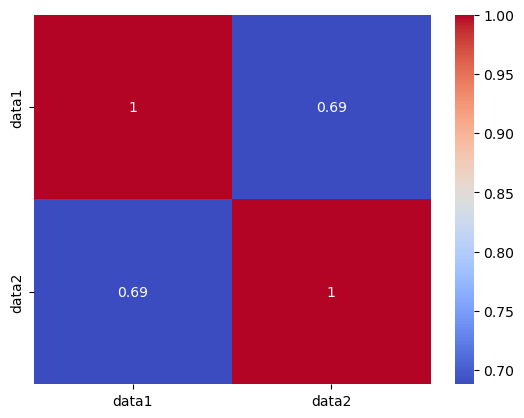

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
corr_matrix = pd.DataFrame({'data1': data1, 'data2': data2}).corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


## Spearman's Rank Correlation

Tests whether two samples have a **monotonic relationship**.

**Assumptions**

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked

**Interpretation**

- **H0**: the two samples are independent.
- **H1**: there is a dependency between the samples.

In [25]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


## Kendall's Rank Correlation

Tests whether two samples have a **monotonic relationship**.

Se examinan todos los pares posibles de observaciones $(x_i, y_i)$ y se determina si son concordantes o discordantes:
- Un par es **concordante** si, para un par de observaciones $(x_i, y_i)$ y $(x_j, y_j)$, se cumple que tanto $x_i < x_j$ como $y_i < y_j$ o bien $x_i > x_j$ y $y_i > y_j$.
- Un par es **discordante** si  $x_i < x_j$ pero $y_i > y_j$ o bien $x_i > x_j$ y $y_i < y_j$.

**Assumptions**

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked

**Interpretation**

- **H0**: the two samples are independent.
- **H1**: there is a dependency between the samples.

In [29]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


## Chi-squared Test

Tests whether **two categorical** variables are related or independent.

**Assumptions**

- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

**Interpretation**

- **H0**: the two samples are independent.
- **H1**: there is a dependency between the samples.

In [33]:
import pandas as pd
import numpy as np

data = {
    'Producto': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D'],
    'Genero': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino', 
               'Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino', 'Femenino'],
}
df = pd.DataFrame(data)

# Crear una tabla de contingencia con las frecuencias
contingency_table = pd.crosstab(df['Producto'], df['Genero'])
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1.333, p=0.721
Probably independent
